# Problems

In [2]:
import math as math
# https://docs.python.org/3/library/math.html
import itertools
# https://docs.python.org/3/library/itertools.html
import random
# https://docs.python.org/3/library/random.html
import numpy as np
# https://numpy.org/doc/stable/
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/contents.html
import seaborn as sns
# https://seaborn.pydata.org/
import pandas as pd
# https://pandas.pydata.org/pandas-docs/stable/index.html
import scipy.stats as stats
# https://docs.scipy.org/doc/scipy/reference/stats.html
from collections import Counter
# https://docs.python.org/3/library/collections.html#collections.Counter

## Problem 1 - Combinations and Simulation

The lady tasting tea is an experiment devised by British polymath Ronald Fisher in 1935. It was based on the claim of Fisher's acquaintance, Muriel Bristol, who stated she could tell whether milk or tea was poured first into a cup. Fisher's intention was not about tea, but about designing an experiment to test a claim fairly, minimizing the factor of randomness so that the claim could be proved or disproved on an objective basis.\
The null hypothesis of the experiment is that the taster has no remarkable ability and is simply guessing at random.
The alternative hypothesis is that the tester has the special ability she/he/they claims. The probability of guessing correctly at random is calculated and then compared to a statistical threshold (usually 5%). If the taster correctly recognised a number of cups that would be highly unlikely to be guessed at random ( usually with probability less than 5%), then the null hypothesis could be rejected.\
https://en.wikipedia.org/wiki/Lady_tasting_tea

##### Calculation of the probability of selecting 0, 1, 2, 3 cups from 10 randomly

First I need to count number of ways how to choose 3 cups from 10. Factorial number! is a number of ways how to arrange certain number of objects. Binomial coefficient formula gives us number of ways of selecting k objects from n objects without replacement and without order.

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

In [3]:
# Using math.factorial
total_cups=10
special_cups=3
ways = math.factorial(total_cups) / (math.factorial(special_cups) * math.factorial(total_cups - special_cups))
ways

120.0

In [5]:
cups_list = list(range(total_cups))
cups_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
# Or itertools.combinations
combs_cups = list(itertools.combinations(cups_list, special_cups))
len(combs_cups)

120

There are 120 ways of choose 3 cups from 10 cups.

Calculation of probability with hypergeometric formula

$$
P(\text{correct\_cups}) =
\frac{\binom{\text{special\_cups}}{\text{correct\_cups}} \cdot \binom{\text{total\_cups} - \text{special\_cups}}{\text{cups\_chosen} - \text{correct\_cups}}}
{\binom{\text{total\_cups}}{\text{cups\_chosen}}}
$$


https://www.youtube.com/watch?v=uzN7U88KSx8

In [7]:
prob_0 = (math.comb(3, 0) * math.comb(10 - 3, 3 - 0)) / math.comb(10, 3)
prob_0 * 100

29.166666666666668

29,16 % probability of choosing no cup right.

In [8]:
prob_1 = (math.comb(3, 1) * math.comb(10 - 3, 3 - 1)) / math.comb(10, 3)
prob_1 * 100

52.5

52.5 % probability of choosing 1 cup right.

In [9]:
prob_2 = (math.comb(3, 2) * math.comb(10 - 3, 3 - 2)) / math.comb(10, 3)
prob_2 * 100

17.5

17.5 % probability of choosing 2 cups right.

In [10]:
prob_3 = (math.comb(3, 3) * math.comb(10 - 3, 3 - 3)) / math.comb(10, 3)
prob_3 * 100

0.8333333333333334

0.83 % probability of choosing all 3 cups right.

##### Simulation

In [11]:
total_cups = 10
special_cups = 3
cups_chosen = 3
trials = 1000
cups_list = list(range(total_cups))

# Simulation
results = []
for _ in range(trials):
    # randomly choose the "special" cups
    special_set = set(random.sample(cups_list, special_cups))
    # randomly choose the guess
    guess_set = set(random.sample(cups_list, cups_chosen))
    # count overlap
    overlap = len(special_set & guess_set)
    results.append(overlap)


counts = Counter(results) # Count frequencies
counts_sorted = dict(sorted(counts.items()))# Sorting counts

simulated_probs = {k: counts[k] / trials for k in range(special_cups + 1)}
#Print results
print("counts:", counts_sorted)
print("simulated_probs:", simulated_probs)

counts: {0: 309, 1: 519, 2: 164, 3: 8}
simulated_probs: {0: 0.309, 1: 0.519, 2: 0.164, 3: 0.008}


After running this simulation 5 times, I got 5 different results in counts and probability. This is thanks to sampling error. As 3 cups with milk first and  3 cups guessed by the taster are chosen randomly, the probability fluctuates around 5 percent of the theoretical value.\
https://en.wikipedia.org/wiki/Sampling_error

The law of large number states that the average of the results obtained from a large number of independent random samples converges to the true value.\ 
https://en.wikipedia.org/wiki/Law_of_large_numbers

I am going to increase number of trials to 1000000.

In [12]:
# Simulation 1000000 trials
results_million = []
for _ in range(1000000):
    # randomly choose the "special" cups
    special_set = set(random.sample(cups_list, special_cups))
    # randomly choose the guess
    guess_set = set(random.sample(cups_list, cups_chosen))
    # count overlap
    overlap = len(special_set & guess_set)
    results_million.append(overlap)


counts_million = Counter(results_million) # Count frequencies
counts_sorted_million = dict(sorted(counts_million.items()))# Sorting counts

simulated_probs_million = {k: counts_million[k] / 1000000 for k in range(special_cups + 1)}
#Print results
print("counts:", counts_sorted_million)
print("simulated_probs:", simulated_probs_million)

counts: {0: 291289, 1: 525304, 2: 174987, 3: 8420}
simulated_probs: {0: 0.291289, 1: 0.525304, 2: 0.174987, 3: 0.00842}


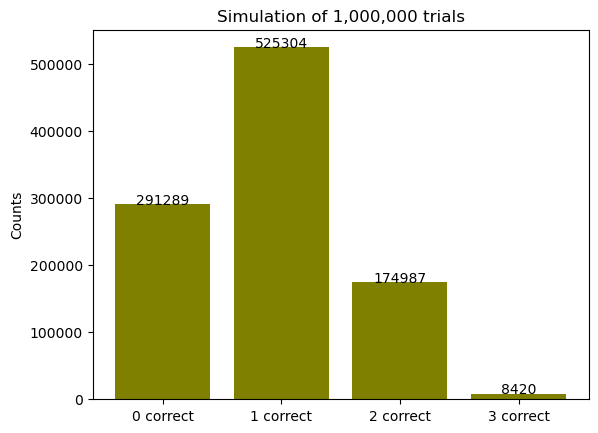

In [ ]:
# Plot 
ks = list(counts_sorted_million.keys())
values = list(counts_sorted_million.values())
# Labels and title
plt.bar(ks, values, tick_label=[f"{k} correct" for k in ks], color='olive')
plt.ylabel("Counts")
plt.title(f"Simulation of 1,000,000 trials")

# labels above bars
for i, v in zip(ks, values):
    plt.text(i, v + 5, str(v), ha='center')

plt.show()

## Problem 2: Normal Distribution

A normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

The parameter μ is the mean or expectation of the distribution (and also its median and mode), while the parameter 
$σ^2$ is the variance. The standard deviation of the distribution is σ. A random variable with a Gaussian distribution is said to be normally distributed. 

https://en.wikipedia.org/wiki/Normal_distribution

##### Generating a sample of 100000 values
https://numpy.org/doc/2.2/reference/random/generated/numpy.random.standard_normal.html#numpy.random.standard_normal

In [32]:
# Generating the sample
data=np.random.standard_normal(100000)
data

array([ 1.45647156, -0.63697959,  1.61322238, ..., -0.40597736,
       -0.34947093, -0.54356063])

##### Shapiro-Wilk test

The Shapiro-Wilk test tests the null hypothesis that a data was drawn from a normal distribution. The W statistic is a measure of how close the data distribution is to a normal distribution. P-value measures the probability of observing the W value. If the p-value is greater than 0.05, it indicates that the data are probably normally distributed.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [33]:
stats.shapiro(data)

c:\Users\Lucia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999858140945435, pvalue=0.9903035759925842)

In the documentation for the Shapiro-Wilk test, it is noted that with a number of samples over 5000, the W-statistic is accurate, but the p-value may not be. It is given by the limitation of the software in the calculation of the p-value over 5000. There is also a strong indication that with a W-statistic as extreme as 0.99, the data are probably from a normal distribution.\
https://github.com/scipy/scipy/blob/v1.16.1/scipy/stats/_morestats.py#L1943-L2030\
I am going to use the Kolmogorov-Smirnov test, which could work with large numbers of samples, to prove the normal distribution of data. This test (when just one sample is tested) compares the data's distribution to the theoretical distribution ( which could be normal, exponential, uniform, and so on). Then the D-statistic value is calculated. The range of the d-statistic is from 0 to 1. The closer the d-statistic value is to 0, the more similar the data's distribution is to the theoretical distribution. P-value is a calculation of the probability of reaching a d-statistic value. The statistic location is the point of maximal difference between the theoretical distribution and the data's distribution. The statistical sign shows the shift of data values to theoretical data values. 1 smaller values, -1 larger values than expected. The null hypothesis is that the sample's distribution is not significantly different from the theoretical distribution when the p-value > 0.05.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#kstest

In [34]:
stats.kstest(data, 'norm')

KstestResult(statistic=0.0029372997307024196, pvalue=0.35346000037789416, statistic_location=-0.9130706211462409, statistic_sign=1)

I can assume that the data are normally distributed.

##### Histogram and plot of normal probability density function

A histogram is a plot of the distribution of values.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy-stats-norm

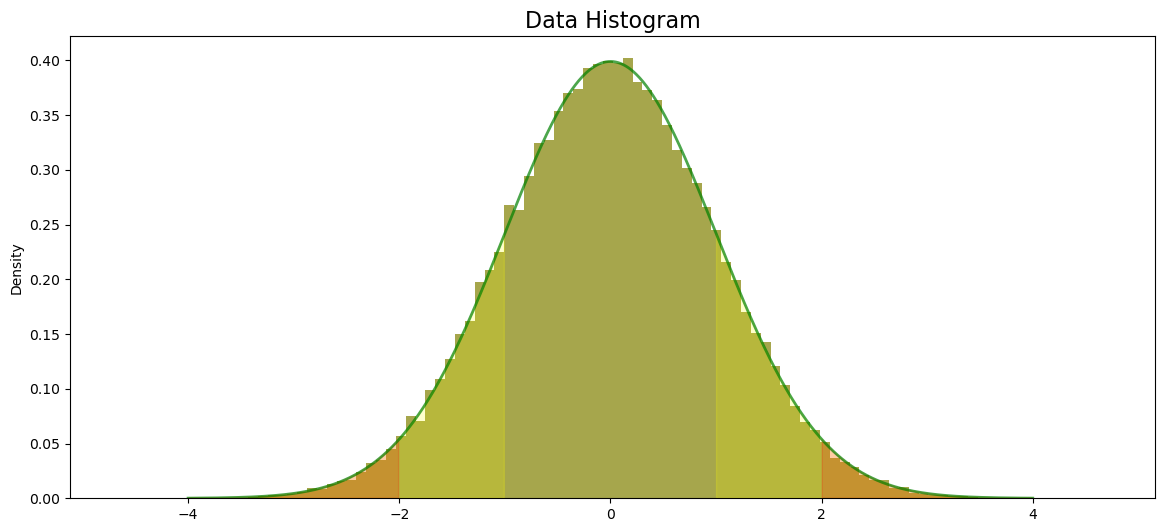

In [35]:
fig, ax = plt.subplots(figsize=(14, 6))

# Histogram
ax.hist(data, bins=100, color='olive', density=True, alpha=0.7)

# X values for the curve
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)

# Standard normal PDF
ax.plot(x, y, lw=2, color='green',  alpha=0.7)  

# 68-95-99.7 rule
ax.fill_between(x, y, where=(x < -1) | (x > 1), alpha=0.2, color='yellow')
ax.fill_between(x, y, where=(x < -2) | (x > 2), alpha=0.2, color='red')

# Labels
ax.set_title("Data Histogram", fontsize=16)
ax.set_ylabel("Density")
plt.show()

The histogram shows a typical curve of data that is normally distributed - bell-shaped and symmetrical around the mean. About 68% of the data fall within 1 standard deviation of the mean, about 95% of the data fall within 2 standard deviations of the mean, and about 99.7% of the data fall within 3 standard deviations of the mean.

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#:~:text=In%20statistics%2C%20the%2068%E2%80%9395,sigma

## Problem 3: T-Tests

Comparision of the resting heart rates of smokers and non-smokers by t-statistic using Python without scipy or statsmodels. Then comparing it to the value given by scipy.stats.

##### What is T-Test


#### Data
Patient ID	Smokes	Resting Heart Rate\
0&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;81\
1&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;68\
2&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;69\
3&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;76\
4&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;74\
5&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;77\
6&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;79\
7&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;75\
8&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;61\
9&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;68\
10&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;74\
11&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;72\
12&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;73\
13&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;70\
14&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;67\
15&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;67

As data to compare are unpaired samples, I chose independent t-test. 

In [17]:
# Arrays 
smokers = [81, 69, 76, 77, 79, 61, 74, 73, 70]
nonsmokers = [68, 74, 75, 68, 72, 67, 67]

#### Assumptions
There are 6 assumptions that independent t-test should meet:\
https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
1. Dependent variable should be measured on a continuous scale - O.K. in our case.
2. Independent variable should consist of two categorical, independent groups - O.K. in our case.
3. Independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves - O.K. in our case.
4. There should be no significant outliers - it will be checked.
5. Dependent variable should be approximately normally distributed for each group of the independent variable - it will be checked.
6. Homogeneity of variances - it will be checked

##### Interquartile range method to find outliers

In this method, median, first interquatile (Q1) and third interquartile (Q3) values have to be identified. Q3 - Q1 is giving interquartile range (IQR). Than, lower and upper fence values can be calculated as: 

Upper fence = Q3 + (1.5 * IQR)

Lower fence = Q1 - (1.5 * IQR)


The significant outliers are any values greater than upper fence value or less than lower fence value.

https://en.wikipedia.org/wiki/Interquartile_range

In [18]:
# sorting helps to identify median, Q1, Q3 values
smokers_sorted = sorted(smokers)
nonsmokers_sorted = sorted(nonsmokers)

print("Smokers sorted:", smokers_sorted)
print("Non-smokers sorted:", nonsmokers_sorted)

Smokers sorted: [61, 69, 70, 73, 74, 76, 77, 79, 81]
Non-smokers sorted: [67, 67, 68, 68, 72, 74, 75]


In [19]:
smokers_M = 74                        
smokers_Q1 = 70                                                  
smokers_Q3 = 77
smokers_IQR = smokers_Q3 - smokers_Q1 

low_fence_smokers= smokers_Q1 - (1.5 * smokers_IQR)
high_fence_smokers = smokers_Q3 + (1.5 * smokers_IQR)

print("Low fence for smokers: ",low_fence_smokers)
print("High fence for smokers: ",high_fence_smokers)
print("Smokers data: ", smokers_sorted)

Low fence for smokers:  59.5
High fence for smokers:  87.5
Smokers data:  [61, 69, 70, 73, 74, 76, 77, 79, 81]


No significant outliers for smokers array can be found.

In [20]:
nonsmokers_M = 68                        
nonsmokers_Q1 = 67.5                                                  
nonsmokers_Q3 = 73
nonsmokers_IQR = nonsmokers_Q3 - nonsmokers_Q1 

low_fence_nonsmokers= nonsmokers_Q1 - (1.5 * nonsmokers_IQR)
high_fence_nonsmokers = nonsmokers_Q3 + (1.5 * nonsmokers_IQR)

print("Low fence for nonsmokers: ",low_fence_nonsmokers)
print("High fence for smokers: ",high_fence_nonsmokers)
print("Smokers data: ", nonsmokers_sorted)

Low fence for nonsmokers:  59.25
High fence for smokers:  81.25
Smokers data:  [67, 67, 68, 68, 72, 74, 75]


No significant outlier for nonsmoker array can be found.

##### Normal distribution check

I decide to check normal distribution of values with Shapiro-Wilk testas as this method works well for small datasets. Minimum of samples for Shapiro-Wilk test is 3.

In [21]:
stats.shapiro(smokers)

ShapiroResult(statistic=0.9473088979721069, pvalue=0.6605566143989563)

In [29]:
stats.shapiro(nonsmokers)

ShapiroResult(statistic=0.8303568959236145, pvalue=0.08064436167478561)

I can assume that data in both arrays are normally distributed as p-value in both test is not higher than 0.05.

##### Homogeneity of variances

Variance measures how values of dataset are spread around the mean.
 
A small variance → data points are close to the mean.\
A large variance → data points are more spread out.

Very easy way how to compare variances of datasets is using boxplot. If lenghts of whiskers differ greatly, data in datasets are not spread similarly.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: >

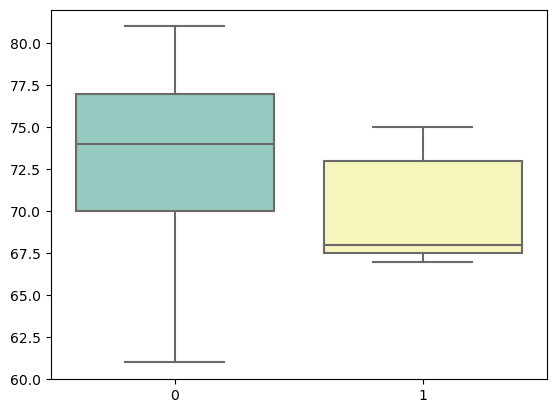

In [30]:
sns.boxplot(data=(smokers, nonsmokers), palette="Set3")

There is not homogeneity of variances between these datasets. 

In [7]:
# Welch's t-Test
stats.ttest_ind(smokers, nonsmokers, equal_var = False)

Ttest_indResult(statistic=1.328165641371784, pvalue=0.20694631459381652)

## Problem 4: Type I Errors

In [33]:

# initialize counter
no_type_i = 0
alpha = 0.05
n_sim = 10000

for _ in range(n_sim):
    # generate 3 samples of size 100 each
    sample_a = np.random.standard_normal(100)
    sample_b= np.random.standard_normal(100)
    sample_c= np.random.standard_normal(100)
    
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample_a, sample_b, sample_c)
    
    # check if we made a type I error
    if p_value < alpha:
        no_type_i += 1

# estimate probability
prob_type_i = no_type_i / n_sim
print(f"Estimated Type I Error Rate: {prob_type_i:}")


Estimated Type I Error Rate: 0.0503


## Problem 5: Binomial distribution

##### What is the binomial distribution?

"The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p)."

 https://en.wikipedia.org/wiki/Binomial_distribution

The term "discrete" describes situations where a random variable can take on specific, separate values (not any value in between).  In comparision with normal distribution (which is theoretically infinite) normal distribution is finite. Examples of experiments where data are distributed binomial could be coins flips or guessing the right answers in test randomnly.

The probability mass function (PMF) of the binomial distribution:

$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, 2, \dots, n
$$

where

n = Total number of trials\
k = Number of successes\
p = Probability of success in the range 0 ≤ p ≤ 1


For generating samples from binomial distribution, I going to use numpy.random.binomial().
https://numpy.org/doc/2.0/reference/random/generated/numpy.random.binomial.html#numpy-random-binomial

In [ ]:
# Simulate: a person guesses 100 yes/no questions
guess_test1 = np.random.binomial(n=1, p=0.5, size=100)
print(guess_test1)

[1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0]


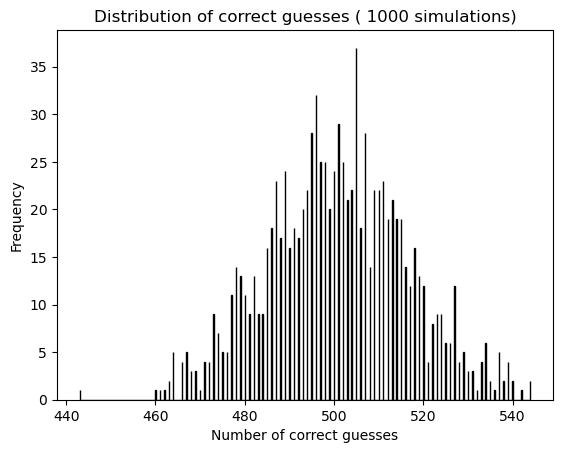

In [42]:
# now simulation of 1000 people guessing 1000 yes/no questions
n_questions = 1000   # number of yes/no questions
p = 0.5             # probability of correct guess
n_trials = 1000  # simulate 1000 times

scores = np.random.binomial(n_questions, p, size=n_trials)

# plot histogram
plt.hist(scores, bins=1000, edgecolor='black', color='blue')
plt.xlabel('Number of correct guesses')
plt.ylabel('Frequency')
plt.title('Distribution of correct guesses ( 1000 simulations)')
plt.show()


This plot reminds the plot of normal distribution. I am going to check this shapiro-wilk test.

In [43]:
normal_bool=stats.shapiro(scores)
normal_bool

ShapiroResult(statistic=0.9980089068412781, pvalue=0.2863914370536804)

Shapiro-Wilk test gave me proof of normally distributed data. Even though, I cannot assume that this data are normally distributed. "In probability theory, the central limit theorem (CLT) states that, under appropriate conditions, the distribution of a normalized version of the sample mean converges to a standard normal distribution."
https://en.wikipedia.org/wiki/Central_limit_theorem\
In the case of binomial distribution these conditions are p-value = 0.5 and number of samples are n(1−p) ≥ 5.

In [ ]:
# Simulation of 50 people guessing 20 questions, each with 4 options, only 1 is correct
questions4 = 20   # number of questions
p4 = 0.25             # 1 from 4 answers is correct
trials4 = 50 # simulate 50 times

scores4 = np.random.binomial(questions4, p4, trials4)

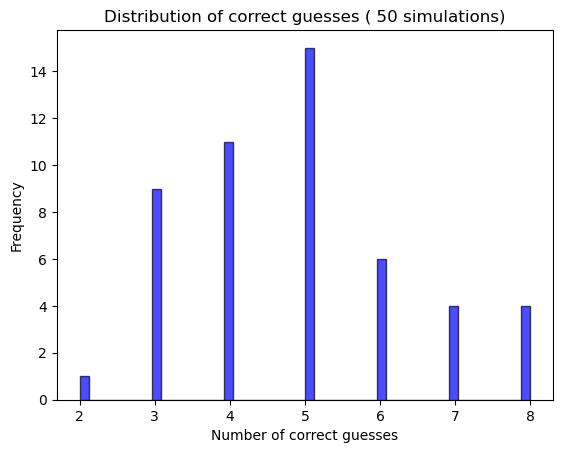

In [35]:
# plot histogram
plt.hist(scores4, bins=50, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Number of correct guesses')
plt.ylabel('Frequency')
plt.title('Distribution of correct guesses ( 50 simulations)')
plt.show()

In [34]:
normal_bool4=stats.shapiro(scores4)
normal_bool4

ShapiroResult(statistic=0.9281250834465027, pvalue=0.004696258809417486)

Based on the Shapiro-Wilk test values of statistic and p, I can assume that this data does not come from normal distribution.

***
## End